# Predicting the onset of Diabetes Mellitus using a Logistic Regression Model

Here we will predict the onset of diabetes mellitus using a logistic regression model. The dataset is obtained from Kaggle: https://www.kaggle.com/uciml/pima-indians-diabetes-database

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of seven medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [1]:
import numpy as np
import pandas as pd

## Loading the dataset:

In [4]:
dataset = pd.read_csv("diabetes.csv")

column_names = list(dataset.columns.values)

dataset.head()

#print(dataset.shape)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Splitting the columns into the indicator variables and the target variable

In [5]:
feature_cols = column_names[:-1]
print("Features:")
print(feature_cols)

X = dataset[feature_cols]
y = dataset['Outcome']

print(type(X))
print(type(y))

Features:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [7]:
counts = dataset['Outcome'].value_counts()
print(counts)

0    500
1    268
Name: Outcome, dtype: int64


## Building the Logistic Regression Model

For this we would use the Scikit-Learn Toolbox of Python. We first split the database into a training (fitting) and testing dataset. We do this using the train_test_split function of scikit-learn. 

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=3) #test_size is the fraction of split, 
                                                                                  #random state is the seed

In [33]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## The coefficients of the fitted model

In [34]:
coefficients = logreg.coef_.tolist()
print(coefficients[0])

[0.10414020723764872, 0.028563554664310466, -0.014392233172391546, 0.002019378172584207, -0.00046265444227690337, 0.04454233230062291, 0.6897193742015068, 0.005935897238609142]


In [35]:
d = {'Indicators':feature_cols,'Model Coefficient':coefficients[0]}
model_coef = pd.DataFrame(d)
print(model_coef)

                 Indicators  Model Coefficient
0               Pregnancies           0.104140
1                   Glucose           0.028564
2             BloodPressure          -0.014392
3             SkinThickness           0.002019
4                   Insulin          -0.000463
5                       BMI           0.044542
6  DiabetesPedigreeFunction           0.689719
7                       Age           0.005936


## Testing the accuracy of the fitted model 

In [36]:
#test on the held out test data
y_pred=logreg.predict(X_test)

In [37]:
print(logreg.score(X_test,y_test))

0.71875


In [21]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

print(cnf_matrix)

[[119  11]
 [ 26  36]]


In [36]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226


In [15]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]

In [18]:
threshold = {'Predicted Decision':y_pred,'Logistic Function Value':y_pred_proba}
threshold = pd.DataFrame(threshold)

threshold

,Predicted Decision,Logistic Function Value
0,1,0.895347
1,0,0.213419
2,0,0.140925
3,1,0.602990
4,0,0.172092
5,0,0.076185
6,1,0.689764
7,1,0.748744
8,0,0.441914
9,0,0.375947


### Some visulizations

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,257.44,'Predicted')

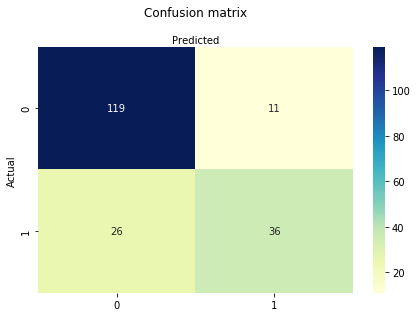

In [23]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

### Receiver Operator Characteristic

An area under the curve of 1 represents a perfect classifier whereas AUC of 0.5 implies random choice

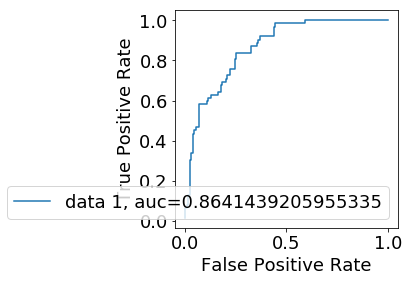

In [25]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.rcParams['figure.figsize'] = 4,4
plt.tick_params(labelsize=18)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4, fontsize = 18)
plt.xlabel("False Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate", fontsize=18)
plt.show()